In [1]:
import pandas as pd 
ebola = pd.read_csv('data/country_timeseries.csv')
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [2]:
ebola.shape[0] - ebola.count()

Date                     0
Day                      0
Cases_Guinea            29
Cases_Liberia           39
Cases_SierraLeone       35
Cases_Nigeria           84
Cases_Senegal           97
Cases_UnitedStates     104
Cases_Spain            106
Cases_Mali             110
Deaths_Guinea           30
Deaths_Liberia          41
Deaths_SierraLeone      35
Deaths_Nigeria          84
Deaths_Senegal         100
Deaths_UnitedStates    104
Deaths_Spain           106
Deaths_Mali            110
dtype: int64

In [3]:
ebola['Cases_Guinea'].value_counts(dropna=False)

NaN       29
86.0       3
495.0      2
112.0      2
390.0      2
          ..
1199.0     1
1298.0     1
1350.0     1
1472.0     1
49.0       1
Name: Cases_Guinea, Length: 89, dtype: int64

In [4]:
### 기억해주세요! 
ebola.isnull().sum()

Date                     0
Day                      0
Cases_Guinea            29
Cases_Liberia           39
Cases_SierraLeone       35
Cases_Nigeria           84
Cases_Senegal           97
Cases_UnitedStates     104
Cases_Spain            106
Cases_Mali             110
Deaths_Guinea           30
Deaths_Liberia          41
Deaths_SierraLeone      35
Deaths_Nigeria          84
Deaths_Senegal         100
Deaths_UnitedStates    104
Deaths_Spain           106
Deaths_Mali            110
dtype: int64

In [5]:
#누락값 채우기

ebola_fill_zero = ebola.fillna(0)
ebola_fill_zero
ebola_fill_zero['Date'] = pd.to_datetime(ebola_fill_zero['Date'], format='%m/%d/%Y')

In [6]:
import plotly.express as px

fig = px.line(ebola_fill_zero, x="Date", y="Cases_Guinea")
fig.show()

In [7]:
bfill_ebola = ebola.fillna(method='bfill')
interpolate_ebola = ebola.interpolate()

In [8]:
fig = px.line(bfill_ebola, x="Date", y="Cases_Guinea")
fig.show()

In [9]:
fig = px.line(interpolate_ebola, x="Date", y="Cases_Guinea")
fig.show()

In [10]:
# 특정 칼럼을 기준으로 None을 제거하고 싶을 때
none_guinea = ebola.dropna(subset='Cases_Guinea')
none_guinea.isnull().sum()

Date                    0
Day                     0
Cases_Guinea            0
Cases_Liberia          33
Cases_SierraLeone      15
Cases_Nigeria          57
Cases_Senegal          70
Cases_UnitedStates     78
Cases_Spain            80
Cases_Mali             83
Deaths_Guinea           1
Deaths_Liberia         32
Deaths_SierraLeone     14
Deaths_Nigeria         57
Deaths_Senegal         73
Deaths_UnitedStates    78
Deaths_Spain           80
Deaths_Mali            83
dtype: int64

In [11]:
subset_ebola = ebola[['Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone']]
subset_ebola['Cases_multiple'] =  subset_ebola['Cases_Guinea'] + subset_ebola['Cases_Liberia'] + subset_ebola['Cases_SierraLeone']

C:\Users\heysunn\AppData\Local\Temp\ipykernel_14356\122026776.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [12]:
# None이 포함된 칼럼을 연산하면 None이 결과로 나온다.
subset_ebola

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_multiple
0,2776.0,NaN,10030.0,NaN
1,2775.0,NaN,9780.0,NaN
2,2769.0,8166.0,9722.0,20657.0
3,NaN,8157.0,NaN,NaN
4,2730.0,8115.0,9633.0,20478.0
...,...,...,...,...
117,103.0,8.0,6.0,117.0
118,86.0,NaN,NaN,NaN
119,86.0,NaN,NaN,NaN
120,86.0,NaN,NaN,NaN


In [13]:
subset_ebola['Cases_multiple'].sum()

197682.0

In [14]:
subset_ebola['Cases_Guinea'].sum() + subset_ebola['Cases_Liberia'].sum() + subset_ebola['Cases_SierraLeone'].sum()

489743.0

In [15]:
from datetime import datetime

In [16]:
datetime.now()

datetime.datetime(2022, 7, 12, 9, 28, 3, 855993)

In [17]:
t1 = datetime.now() 
t2 = datetime(1970, 1, 1)
t3 = datetime(1970, 12, 12, 13, 24, 34)

print(t1)
print(t2)
print(t3)

2022-07-12 09:28:04.002959
1970-01-01 00:00:00
1970-12-12 13:24:34


In [18]:
diff1=t1-t2

print(diff1)
print(type(diff1))

#timedelta 는 자료형이 시간 흐름을 나타내는거 

19185 days, 9:28:04.002959
<class 'datetime.timedelta'>


In [19]:
import pandas as pd 
import os
ebola = pd.read_csv('data/country_timeseries.csv')

In [20]:
ebola['date_dt'] = pd.to_datetime(ebola['Date'])
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [21]:
now = datetime.now()
print(now)

2022-07-12 09:28:04.458940


In [22]:
nowDate = now.strftime('%Y-%m-%d')  #데이터포맷 지정  #시계열 연산시 좋음
print(nowDate)
nowDate2 = now.strftime('%Y-%m')
print(nowDate2)
nowTime = now.strftime('%H:%M:%S')
print(nowTime) 
nowDatetime = now.strftime('%Y-%m-%d %H:%M:%S')
print(nowDatetime) 

2022-07-12
2022-07
09:28:04
2022-07-12 09:28:04


In [23]:
ebola1 = pd.read_csv('data/country_timeseries.csv', parse_dates=['Date'])  #불러올떄 데이터타임형으로 불러오는거 
print(ebola1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    datetime64[ns]
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [24]:
date_series = pd.Series(['2018-05-16', '2018-05-17', '2018-05-18'])
d1 = pd.to_datetime(date_series) 
print(d1)

0   2018-05-16
1   2018-05-17
2   2018-05-18
dtype: datetime64[ns]


In [25]:
d1[0].month

5

In [26]:
d1[0].hour

0

In [27]:
ebola['year'] = ebola['date_dt'].dt.year
print(ebola[['Date', 'date_dt', 'year']].head())

         Date    date_dt  year
0    1/5/2015 2015-01-05  2015
1    1/4/2015 2015-01-04  2015
2    1/3/2015 2015-01-03  2015
3    1/2/2015 2015-01-02  2015
4  12/31/2014 2014-12-31  2014


In [28]:
ebola['month'], ebola['day'] = (ebola['date_dt'].dt.month, ebola['date_dt'].dt.day)

print(ebola[['Date', 'date_dt', 'year', 'month', 'day']].head())

         Date    date_dt  year  month  day
0    1/5/2015 2015-01-05  2015      1    5
1    1/4/2015 2015-01-04  2015      1    4
2    1/3/2015 2015-01-03  2015      1    3
3    1/2/2015 2015-01-02  2015      1    2
4  12/31/2014 2014-12-31  2014     12   31


In [29]:
print(ebola.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

In [30]:
import pandas as pd

customer_master=pd.read_csv('C:/alpa/최진영강사님/data/쇼핑몰데이터/customer_master.csv')
customer_master.head()

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,tsuruoka_kaoru@example.com,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,oouchi_takashi@example.com,M,54,1965-08-05,울산광역시


In [31]:
item_master=pd.read_csv('C:/alpa/최진영강사님/data/쇼핑몰데이터/item_master.csv')
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [32]:
transaction_1=pd.read_csv('C:/alpa/최진영강사님/data/쇼핑몰데이터/transaction_1.csv')
transaction_1.tail()  #거래아이디 거래가격 거래시간 # 누가구매했는지

,transaction_id,price,payment_date,customer_id
4995,T0000005108,210000,2019-06-15 02:42:41,HD315748
4996,T0000005109,150000,2019-06-15 03:36:16,HI215420
4997,T0000005110,50000,2019-06-15 03:44:06,IK880102
4998,T0000005111,210000,2019-06-15 04:14:06,IK074758
4999,T0000005112,50000,2019-06-15 04:42:38,HD444151


In [33]:
transaction_2=pd.read_csv('C:/alpa/최진영강사님/data/쇼핑몰데이터/transaction_2.csv')
transaction_2.head()  #1과 2 비슷하게생김 똑같은게 아닐까  1의 테일을 보면 날짜로 잘린듯

,transaction_id,price,payment_date,customer_id
0,T0000005113,295000,2019-06-15 07:20:27,TS169261
1,T0000005114,50000,2019-06-15 07:35:47,HI599892
2,T0000005115,85000,2019-06-15 07:56:36,HI421757
3,T0000005116,50000,2019-06-15 08:40:55,OA386378
4,T0000005117,120000,2019-06-15 08:44:23,TS506913


In [34]:
transaction_detail_1=pd.read_csv('C:/alpa/최진영강사님/data/쇼핑몰데이터/transaction_detail_1.csv')
transaction_detail_1.head()   #디테일 아이디 거래아이디 아이템 아이디 수량   1과 2는 콘캣으로 합치면 되겠구낭

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [35]:
transaction_detail_2=pd.read_csv('C:/alpa/최진영강사님/data/쇼핑몰데이터/transaction_detail_2.csv')
transaction_detail_2.head()

,detail_id,transaction_id,item_id,quantity
0,5000,T0000004870,S002,3
1,5001,T0000004871,S003,1
2,5002,T0000004872,S001,2
3,5003,T0000004873,S004,1
4,5004,T0000004874,S003,2


In [36]:
transaction=pd.concat([transaction_1,transaction_2], ignore_index=True)
transaction.head()

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [37]:
transaction_detail=pd.concat([transaction_detail_1,transaction_detail_2], ignore_index=True)
transaction_detail.head()

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [38]:
join_data=pd.merge(transaction_detail,transaction[['transaction_id','payment_date','customer_id']], on ='transaction_id',how='left')## on : 칼럼이 같을때  
                                                                                   ## how? 결합을 할건데 교집합으로 할건지 합집합으로할건지
#콘캣으로 합치기 어려움 칼럼이 다 달라서 
#머지는 같은 칼럼이 있을때 하면됨 

In [39]:
print(len(transaction_detail))
print(len(transaction))
print(len(join_data))

7144
6786
7144


In [40]:
transaction.head(2)

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019


In [41]:
transaction_detail.head(2)

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1


In [42]:
join_data.head(1)

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502


In [43]:
### merge 학습
df1=pd.DataFrame({'lkey':['foo','bar','baz','foo'],'value':[1,2,3,5]})
df2=pd.DataFrame({'rkey':['foo','bar','baz','foo'],'value':[5,6,7,8]})

In [44]:
df1

,lkey,value
0,foo,1
1,bar,2
2,baz,3
3,foo,5


In [45]:
df2

,rkey,value
0,foo,5
1,bar,6
2,baz,7
3,foo,8


In [46]:
df1.merge(df2,left_on='lkey',right_on='rkey')

,lkey,value_x,rkey,value_y
0,foo,1,foo,5
1,foo,1,foo,8
2,foo,5,foo,5
3,foo,5,foo,8
4,bar,2,bar,6
5,baz,3,baz,7


In [47]:
df1=pd.DataFrame({'a':['foo','bar'],'b':[1,2]})
df2=pd.DataFrame({'a':['foo','baz'],'c':[3,4]})

In [48]:
df1.merge(df2,how='right',on='a')

,a,b,c
0,foo,1.0,3
1,baz,NaN,4


In [49]:
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


In [50]:
customer_master.head()

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,tsuruoka_kaoru@example.com,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,oouchi_takashi@example.com,M,54,1965-08-05,울산광역시


In [51]:
item_master.head()

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [52]:
join_customer=customer_master.merge(join_data,on='customer_id')
join_customer_item=join_customer.merge(item_master,on='item_id')
join_customer.head()

## 

,customer_id,customer_name,registration_date,email,gender,age,birth,pref,detail_id,transaction_id,item_id,quantity,payment_date
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시,278,T0000000381,S005,1,2019-02-08 07:31:14
1,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시,2904,T0000002879,S003,1,2019-04-14 23:23:23
2,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시,3129,T0000003093,S003,2,2019-04-20 20:02:00
3,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시,439,T0000000533,S002,1,2019-02-11 23:14:31
4,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시,1844,T0000001866,S003,1,2019-03-19 08:19:59


In [53]:
merge1=join_data.merge(customer_master,how='inner',on='customer_id')
merge2=merge1.merge(item_master,how='inner',on='item_id')
merge2.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,PC-E,210000
1,3494,T0000003439,S005,1,2019-04-30 02:39:00,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-E,210000
2,3495,T0000003439,S005,1,2019-04-30 02:39:00,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,PC-E,210000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000
4,753,T0000000832,S005,1,2019-02-19 19:48:24,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,PC-E,210000


In [54]:
join_customer_item=join_customer.merge(item_master,how='left',on='item_id')
join_customer_item.head()

,customer_id,customer_name,registration_date,email,gender,age,birth,pref,detail_id,transaction_id,item_id,quantity,payment_date,item_name,item_price
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시,278,T0000000381,S005,1,2019-02-08 07:31:14,PC-E,210000
1,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시,2904,T0000002879,S003,1,2019-04-14 23:23:23,PC-C,120000
2,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시,3129,T0000003093,S003,2,2019-04-20 20:02:00,PC-C,120000
3,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시,439,T0000000533,S002,1,2019-02-11 23:14:31,PC-B,85000
4,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시,1844,T0000001866,S003,1,2019-03-19 08:19:59,PC-C,120000


In [55]:
len(customer_master['customer_id'].unique())  #보유한 유저 데이터는 5000명인데 
#### 유저수가 상이하기때문에 아우터로 묶으면 nan 값이 나옴
#inner조인해서 결측치 존재 x

5000

In [56]:
len(join_data['customer_id'].unique())  # 해당기간에 실제로 거래한 유저  # 기간중에 거래하지 않은 사람도 있기때문에 null값이 발생함

3018

In [57]:
# inner로 해도 상관없는지 null데이터 불러와서 확인  #True인 애만 가져온느거
join_customer_item[join_customer_item.isnull()]

,customer_id,customer_name,registration_date,email,gender,age,birth,pref,detail_id,transaction_id,item_id,quantity,payment_date,item_name,item_price
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7140,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
join_customer_item.isnull().sum()

customer_id          0
customer_name        0
registration_date    0
email                0
gender               0
age                  0
birth                0
pref                 0
detail_id            0
transaction_id       0
item_id              0
quantity             0
payment_date         0
item_name            0
item_price           0
dtype: int64

In [59]:
merge2['price']=merge2['quantity']*merge2['item_price']
merge2[['quantity','item_price','price']]

,quantity,item_price,price
0,1,210000,210000
1,1,210000,210000
2,1,210000,210000
3,1,210000,210000
4,1,210000,210000
...,...,...,...
7139,1,120000,120000
7140,1,120000,120000
7141,2,120000,240000
7142,1,120000,120000


In [60]:
merge2.describe()  #여러개를 사는 경우가 많지않다 # 아이템 평균가격 # 평균나이

,detail_id,quantity,age,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


In [61]:
merge2.isnull().sum()

detail_id            0
transaction_id       0
item_id              0
quantity             0
payment_date         0
customer_id          0
customer_name        0
registration_date    0
email                0
gender               0
age                  0
birth                0
pref                 0
item_name            0
item_price           0
price                0
dtype: int64

In [62]:
merge2['payment_date']  #타입 : 오브젝트 : 각각 개별로 보겠다는소리 
len(merge2['payment_date'].unique())  #x축이 6785개라는소리

6785

In [63]:
import seaborn as sns

In [64]:
merge2.isnull().sum()

detail_id            0
transaction_id       0
item_id              0
quantity             0
payment_date         0
customer_id          0
customer_name        0
registration_date    0
email                0
gender               0
age                  0
birth                0
pref                 0
item_name            0
item_price           0
price                0
dtype: int64

In [65]:
merge2['payment_date']=pd.to_datetime(merge2['payment_date'])
merge2['payment_month']=merge2['payment_date'].dt.strftime('%Y%m')
merge2[['payment_date','payment_month']].head()

,payment_date,payment_month
0,2019-02-01 01:36:57,201902
1,2019-04-30 02:39:00,201904
2,2019-04-30 02:39:00,201904
3,2019-02-01 02:47:23,201902
4,2019-02-19 19:48:24,201902


In [66]:
merge2.groupby('payment_month').sum()['price']

payment_month
201902    160185000
201903    160370000
201904    160510000
201905    155420000
201906    164030000
201907    170620000
Name: price, dtype: int64

In [157]:
#성별에 따른 매출 총합 
merge2.groupby('gender').sum()['price']

gender
F    481045000
M    490090000
Name: price, dtype: int64

In [68]:
# 태어난 년도 별 매출
# merge2['payment_date']=pd.to_datetime(merge2['payment_date'])
# merge2['payment_month']=merge2['payment_date'].dt.strftime('%Y%m')
# merge2[['payment_date','payment_month']].head()

merge2['birth']=pd.to_datetime(merge2['birth'])  #date타임형식으로 바꾸기 먼저

In [69]:
merge2['birth_year']=merge2['birth'].dt.strftime('%Y')


In [70]:
merge2['birth_year']

0       1989
1       1977
2       1977
3       1972
4       1972
        ... 
7139    1992
7140    1952
7141    1946
7142    1977
7143    1993
Name: birth_year, Length: 7144, dtype: object

In [71]:
year_sum=merge2.groupby('birth_year').sum()['price']
year_sum

birth_year
1938     4405000
1939    15300000
1940    10225000
1941    12270000
1942    14515000
          ...   
1995    13750000
1996    16085000
1997    11935000
1998    16705000
1999     6210000
Name: price, Length: 62, dtype: int64

<AxesSubplot:xlabel='birth_year'>

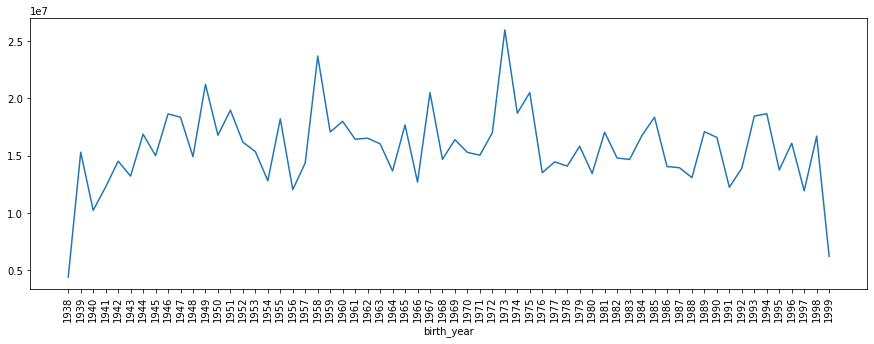

In [72]:
import matplotlib.pylab as plt
fig = plt.figure(figsize = [15,5])
plt.xticks(rotation=90)
sns.lineplot(data=year_sum,x=year_sum.index, y=year_sum.values)

<AxesSubplot:xlabel='birth_year', ylabel='price'>

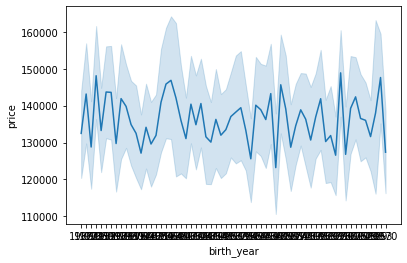

In [73]:
sns.lineplot(data=merge2,x='birth_year',y='price')

In [74]:
#월별 상품별로 판매금액이 얼마인지?

merge2.groupby(['payment_month','item_name']).sum()[['price','quantity']]
monthly_data=merge2.groupby(['payment_month','item_name']).sum()[['price','quantity']]
monthly_data_reset=monthly_data.reset_index()
merge2.groupby(['payment_month','item_name']).sum()[['price','quantity']]

price  quantity
payment_month item_name                    
201902        PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
201903        PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
201904        PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
201905        PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
201906        PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
201907        PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

In [75]:
monthly_data_reset

,payment_month,item_name,price,quantity
0,201902,PC-A,24150000,483
1,201902,PC-B,25245000,297
2,201902,PC-C,19800000,165
3,201902,PC-D,31140000,173
4,201902,PC-E,59850000,285
5,201903,PC-A,26000000,520
6,201903,PC-B,25500000,300
7,201903,PC-C,19080000,159
8,201903,PC-D,25740000,143
9,201903,PC-E,64050000,305


<AxesSubplot:xlabel='payment_month', ylabel='price'>

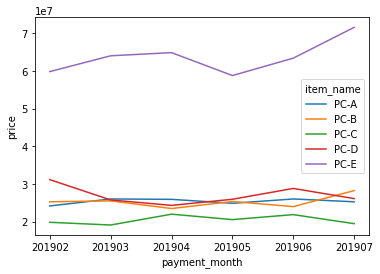

In [76]:
# 상품 월별 총 매출 line 차트로 시각화하기

import seaborn as sns
sns.lineplot(data=monthly_data_reset, x='payment_month',y='price',hue='item_name')


# 대리점 데이터분석!!!!!!!!!!!!!!!

In [77]:
import pandas as pd
user_data = pd.read_csv('C:/alpa/최진영강사님/data/대리점데이터/user.csv')
user_data.head()

,purchase_date,item_name,item_price,customer_name
0,2019-06-13 18:02,상품A,100.0,김가온
1,2019-07-13 13:05,상 품 S,NaN,김우찬
2,2019-05-11 19:42,상 품 a,NaN,김유찬
3,2019-02-12 23:40,상품Z,2600.0,김재현
4,2019-04-22 3:09,상품a,NaN,김강현


In [127]:
customer_data=pd.read_excel('C:/alpa/최진영강사님/data/대리점데이터/customer_data.xlsx')
customer_data.head()

,고객이름,지역,등록일
0,김 현성,H시,2018-01-04 00:00:00
1,김 도윤,E시,42782
2,김 지한,A시,2018-01-07 00:00:00
3,김 하윤,F시,42872
4,김 시온,E시,43127


In [79]:
#상품A~상품 Z까지 27개가 있다고 했지만 훨씬 많이 계산됨 (length 보면 99)
user_data.groupby('item_name')['item_price'].mean()

item_name
 상 품 n    1400.0
 상품 E      500.0
 상품 M     1300.0
 상품 P     1600.0
 상품 S     1900.0
           ...  
상품s       1900.0
상품t       2000.0
상품v       2200.0
상품x       2400.0
상품y       2500.0
Name: item_price, Length: 99, dtype: float64

In [80]:
### 데이터가 오류가 있는 상태로 집계
user_data['purchase_date'] = pd.to_datetime(user_data['purchase_date'])
user_data['purchase_month'] = user_data['purchase_date'].dt.strftime('%Y%m')
res = user_data.pivot_table(index = 'purchase_month', columns = 'item_name', aggfunc='count',fill_value=0)
res


customer_name                                                 \
item_name              상 품 n  상품 E  상품 M  상품 P  상품 S  상품 W  상품 X  상품W 상  품O   
purchase_month                                                                
201901                     1     0     0     0     0     0     0    0     0   
201902                     0     0     0     0     0     0     1    0     0   
201903                     0     1     1     1     0     0     0    0     0   
201904                     0     0     0     0     0     0     0    1     0   
201905                     0     0     0     0     1     0     0    0     0   
201906                     0     0     0     0     0     1     0    0     0   
201907                     0     0     0     0     0     0     0    0     1   

                      ... purchase_date                                      
item_name      상  품Q  ...           상품k 상품l 상품o 상품p 상품r 상품s 상품t 상품v 상품x 상품y  
purchase_month        ...                                                    
201901             0  ...             1   1   1   0   0   0   0   0   0   0  
201902             0  ...             0   0   0   0   0   1   1   1   0   0  
201903             0  ...             0   0   0   0   0   0   0   0   0   0  
201904             1  ...             0   0   0   0   0   1   0   0   0   0  
201905             0  ...             0   1   0   0   0   0   0   0   0   1  
201906             0  ...             0   0   0   1   0   0   0   0   1   0  
201907             0  ...             0   0   1   0   2   0   0   0   0   0  

[7 rows x 297 columns]

In [81]:
## user_dat를 사용하여 상품별 매출합계를 구해보세요 (오류수정선택)
pd.pivot_table(data=user_data, index='item_name',values='item_price',aggfunc=sum)

,item_price
item_name,
상 품 n,1400.0
상품 E,500.0
상품 M,1300.0
상품 P,1600.0
상품 S,1900.0
...,...
상품s,3800.0
상품t,2000.0
상품v,2200.0


In [82]:
def error(value):
    value=value.replace(' ','').lower()
    
    return value

user_data['item_name']=user_data['item_name'].apply(error)
user_data

,purchase_date,item_name,item_price,customer_name,purchase_month
0,2019-06-13 18:02:00,상품a,100.0,김가온,201906
1,2019-07-13 13:05:00,상품s,NaN,김우찬,201907
2,2019-05-11 19:42:00,상품a,NaN,김유찬,201905
3,2019-02-12 23:40:00,상품z,2600.0,김재현,201902
4,2019-04-22 03:09:00,상품a,NaN,김강현,201904
...,...,...,...,...,...
2994,2019-02-15 02:56:00,상품y,2500.0,김정민,201902
2995,2019-06-22 04:03:00,상품m,1300.0,김재원,201906
2996,2019-03-29 11:14:00,상품q,NaN,김지율,201903
2997,2019-07-14 12:56:00,상품h,NaN,김승주,201907


In [83]:
asdasd=pd.pivot_table(data= user_data, index='item_name',values='item_price').reset_index()
asdasd
gggggg=user_data.merge(asdasd,on='item_name',how='left')
gggggg

,purchase_date,item_name,item_price_x,customer_name,purchase_month,item_price_y
0,2019-06-13 18:02:00,상품a,100.0,김가온,201906,100.0
1,2019-07-13 13:05:00,상품s,NaN,김우찬,201907,1900.0
2,2019-05-11 19:42:00,상품a,NaN,김유찬,201905,100.0
3,2019-02-12 23:40:00,상품z,2600.0,김재현,201902,2600.0
4,2019-04-22 03:09:00,상품a,NaN,김강현,201904,100.0
...,...,...,...,...,...,...
2994,2019-02-15 02:56:00,상품y,2500.0,김정민,201902,2500.0
2995,2019-06-22 04:03:00,상품m,1300.0,김재원,201906,1300.0
2996,2019-03-29 11:14:00,상품q,NaN,김지율,201903,1700.0
2997,2019-07-14 12:56:00,상품h,NaN,김승주,201907,800.0


In [84]:
user_data.groupby('item_name').agg({'item_price':['min','max','mean']})  #최소 최대 평균이 같다? 값이 하나다

item_price                
                 min     max    mean
item_name                           
상품a            100.0   100.0   100.0
상품b            200.0   200.0   200.0
상품c            300.0   300.0   300.0
상품d            400.0   400.0   400.0
상품e            500.0   500.0   500.0
상품f            600.0   600.0   600.0
상품g            700.0   700.0   700.0
상품h            800.0   800.0   800.0
상품i            900.0   900.0   900.0
상품j           1000.0  1000.0  1000.0
상품k           1100.0  1100.0  1100.0
상품l           1200.0  1200.0  1200.0
상품m           1300.0  1300.0  1300.0
상품n           1400.0  1400.0  1400.0
상품o           1500.0  1500.0  1500.0
상품p           1600.0  1600.0  1600.0
상품q           1700.0  1700.0  1700.0
상품r           1800.0  1800.0  1800.0
상품s           1900.0  1900.0  1900.0
상품t           2000.0  2000.0  2000.0
상품u           2100.0  2100.0  2100.0
상품v           2200.0  2200.0  2200.0
상품w           2300.0  2300.0  2300.0
상품x           2400.0  2400.0  2400.0
상품y           2500.0  2500.0  2500.0
상품z           2600.0  2600.0  2600.0

In [85]:
# item price none 값을 챙는 방법으로 groupby agg 사용

item_price_df=user_data.groupby('item_name').agg({'item_price':['mean']}).reset_index()
#그룹바이 민 활용
item_price_df

,item_name,item_price
,,mean
0,상품a,100.0
1,상품b,200.0
2,상품c,300.0
3,상품d,400.0
4,상품e,500.0
5,상품f,600.0
6,상품g,700.0
7,상품h,800.0
8,상품i,900.0


In [86]:
# 보기좋게 칼럼명을 수정합니다.  (유저데이터와 머지할때 같은 이름으로 합치기 위해 )
item_price_df.columns = ['item_name','item_price']

In [87]:
# 머지 ( left -> 왼쪽의 데이터만 다 살리면 되기때문에 )
# user_data.merge(item_price_df, on='item_name',how='left')
user_data=user_data.merge(item_price_df, on='item_name',how='left')[['purchase_date','item_name','customer_name','purchase_month','item_price_y']]
user_data=user_data.rename(columns={'item_price_y':'item_price'})
user_data

,purchase_date,item_name,customer_name,purchase_month,item_price
0,2019-06-13 18:02:00,상품a,김가온,201906,100.0
1,2019-07-13 13:05:00,상품s,김우찬,201907,1900.0
2,2019-05-11 19:42:00,상품a,김유찬,201905,100.0
3,2019-02-12 23:40:00,상품z,김재현,201902,2600.0
4,2019-04-22 03:09:00,상품a,김강현,201904,100.0
...,...,...,...,...,...
2994,2019-02-15 02:56:00,상품y,김정민,201902,2500.0
2995,2019-06-22 04:03:00,상품m,김재원,201906,1300.0
2996,2019-03-29 11:14:00,상품q,김지율,201903,1700.0
2997,2019-07-14 12:56:00,상품h,김승주,201907,800.0


In [88]:
user_data.isnull().sum() ## 결측치 없는거 확인

purchase_date     0
item_name         0
customer_name     0
purchase_month    0
item_price        0
dtype: int64

In [89]:
#아이템별로 매출 총합

user_data.groupby('item_name')['item_price'].sum()

item_name
상품a     13900.0
상품b     22600.0
상품c     39900.0
상품d     50000.0
상품e     52500.0
상품f     75600.0
상품g     77000.0
상품h     87200.0
상품i    102600.0
상품j    116000.0
상품k    119900.0
상품l    132000.0
상품m    146900.0
상품n    166600.0
상품o    186000.0
상품p    216000.0
상품q    212500.0
상품r    244800.0
상품s    266000.0
상품t    234000.0
상품u    224700.0
상품v    294800.0
상품w    278300.0
상품x    278400.0
상품y    255000.0
상품z      2600.0
Name: item_price, dtype: float64

In [90]:
qweasdzxc=pd.pivot_table(data=user_data,index='item_name',values='item_price').reset_index()
qweasdzxc

,item_name,item_price
0,상품a,100.0
1,상품b,200.0
2,상품c,300.0
3,상품d,400.0
4,상품e,500.0
5,상품f,600.0
6,상품g,700.0
7,상품h,800.0
8,상품i,900.0
9,상품j,1000.0


In [91]:
user_data_data=user_data.merge(qweasdzxc,on='item_name',how='left')
user_data_data

,purchase_date,item_name,customer_name,purchase_month,item_price_x,item_price_y
0,2019-06-13 18:02:00,상품a,김가온,201906,100.0,100.0
1,2019-07-13 13:05:00,상품s,김우찬,201907,1900.0,1900.0
2,2019-05-11 19:42:00,상품a,김유찬,201905,100.0,100.0
3,2019-02-12 23:40:00,상품z,김재현,201902,2600.0,2600.0
4,2019-04-22 03:09:00,상품a,김강현,201904,100.0,100.0
...,...,...,...,...,...,...
2994,2019-02-15 02:56:00,상품y,김정민,201902,2500.0,2500.0
2995,2019-06-22 04:03:00,상품m,김재원,201906,1300.0,1300.0
2996,2019-03-29 11:14:00,상품q,김지율,201903,1700.0,1700.0
2997,2019-07-14 12:56:00,상품h,김승주,201907,800.0,800.0


In [92]:
customer_data.head()

,고객이름,지역,등록일
0,김 현성,H시,2018-01-04 00:00:00
1,김 도윤,E시,42782
2,김 지한,A시,2018-01-07 00:00:00
3,김 하윤,F시,42872
4,김 시온,E시,43127


In [93]:
user_data.head()

,purchase_date,item_name,customer_name,purchase_month,item_price
0,2019-06-13 18:02:00,상품a,김가온,201906,100.0
1,2019-07-13 13:05:00,상품s,김우찬,201907,1900.0
2,2019-05-11 19:42:00,상품a,김유찬,201905,100.0
3,2019-02-12 23:40:00,상품z,김재현,201902,2600.0
4,2019-04-22 03:09:00,상품a,김강현,201904,100.0


In [145]:
def name(dlfma):
    return dlfma.replace(' ','')
    

customer_data['고객이름']=customer_data['고객이름'].apply(name)

In [146]:
customer_data 
#등록일에서 데이트타임 이 아닌애들만 가져오자


,고객이름,지역,등록일
0,김현성,H시,2018-01-04 00:00:00
1,김도윤,E시,2017-02-18 00:00:00
2,김지한,A시,2018-01-07 00:00:00
3,김하윤,F시,2017-05-19 00:00:00
4,김시온,E시,2018-01-29 00:00:00
...,...,...,...
195,김재희,G시,2017-06-20 00:00:00
196,김도영,E시,2018-06-20 00:00:00
197,김이안,F시,2017-04-29 00:00:00
198,김시현,H시,2019-04-19 00:00:00


In [96]:
type(customer_data['등록일'][0])

datetime.datetime

In [97]:
type(customer_data['등록일'][1])

int

In [98]:
# 람다로 int형인거만 추출 
#등록일이 숫자로 되어있는 데이터를 indexing하는 방법1

customer_data['bool_indexing']=customer_data['등록일'].apply(lambda x: 1 if type(x)==int else 0)
customer_data.head()

,고객이름,지역,등록일,bool_indexing
0,김현성,H시,2018-01-04 00:00:00,0
1,김도윤,E시,42782,1
2,김지한,A시,2018-01-07 00:00:00,0
3,김하윤,F시,42872,1
4,김시온,E시,43127,1


In [114]:
#등록일이 숫자로 되어있는 데이터를 indexing하는 방법2   
#데이터 타입을 스트링으로 수정한뒤 isdigit함수를 활용하여 찾는다.
#isdigit : 문자열에서 숫자로 이루어진 데이터를 찾는다
flg_is_serial=customer_data[customer_data['등록일'].astype('str').str.isdigit()].index
flg_is_serial
#왜 인덱스를 뽑았을까?

Int64Index([  1,   3,   4,  21,  27,  47,  49,  53,  76,  80,  99, 114, 118,
            122, 139, 143, 155, 172, 179, 183, 186, 192],
           dtype='int64')

In [ ]:
#데이터를 변경하기 위해 인덱스를 가져온거 
# customer_data.loc[flg_is_serial,'등록일']='11'

In [124]:
import datetime
pd.to_datetime('1900/01/01')+pd.to_timedelta(customer_data['등록일'][3],unit='D')

Timestamp('2017-05-19 00:00:00')

In [125]:
customer_data.loc[flg_is_serial,'등록일']=customer_data.loc[flg_is_serial,'등록일'].apply(lambda x: pd. to_datetime('1900/01/01')+pd.to_timedelta(x,unit='D'))

In [126]:
customer_data

,고객이름,지역,등록일
0,김 현성,H시,2018-01-04 00:00:00
1,김 도윤,E시,2017-02-18 00:00:00
2,김 지한,A시,2018-01-07 00:00:00
3,김 하윤,F시,2017-05-19 00:00:00
4,김 시온,E시,2018-01-29 00:00:00
...,...,...,...
195,김 재희,G시,2017-06-20 00:00:00
196,김 도영,E시,2018-06-20 00:00:00
197,김 이안,F시,2017-04-29 00:00:00
198,김 시현,H시,2019-04-19 00:00:00


In [ ]:
pd.to_timedelta(42872, unit='D') #타임델타 : 한번에 몇일지났는지 알려줌 유닛단위로  
                                 #데이트타임은 특정시점 한시두시 타임델타는 시간범위 한시간 두시간 

In [130]:
pd.to_timedelta(customer_data.loc[flg_is_serial,'등록일'], unit='D')  #얼마나 지난 시점은 구해졌음 이제 언제부터? 를 더해주면됨


1     42782 days
3     42872 days
4     43127 days
21    42920 days
27    42901 days
47    42741 days
49    42929 days
53    42833 days
76    43188 days
80    43110 days
99    42885 days
114   43254 days
118   43129 days
122   43206 days
139   42880 days
143   42818 days
155   42754 days
172   43181 days
179   42743 days
183   42940 days
186   43294 days
192   43259 days
Name: 등록일, dtype: timedelta64[ns]

In [132]:
customer_data.loc[flg_is_serial,'등록일']=pd.to_timedelta(customer_data.loc[flg_is_serial,'등록일'], unit='D')+pd.to_datetime('1900/01/01') #1900/01/01이후부터 
                                                                                                  #저 날만큼 지났다! 는 뜻

In [133]:
customer_data

,고객이름,지역,등록일
0,김 현성,H시,2018-01-04 00:00:00
1,김 도윤,E시,2017-02-18 00:00:00
2,김 지한,A시,2018-01-07 00:00:00
3,김 하윤,F시,2017-05-19 00:00:00
4,김 시온,E시,2018-01-29 00:00:00
...,...,...,...
195,김 재희,G시,2017-06-20 00:00:00
196,김 도영,E시,2018-06-20 00:00:00
197,김 이안,F시,2017-04-29 00:00:00
198,김 시현,H시,2019-04-19 00:00:00


In [100]:
customer_data
def date(skfWk):
    if type(skfWk)==int:
        return 1
    else: return 0

customer_data['등록일'].apply(date)

0      0
1      1
2      0
3      1
4      1
      ..
195    0
196    0
197    0
198    0
199    0
Name: 등록일, Length: 200, dtype: int64

In [101]:
customer_data['등록일'][0]

datetime.datetime(2018, 1, 4, 0, 0)

In [102]:
customer_data['등록일'][1]  # 4만 몇일이면 day가 아닐까? 라는 생각 

42782

In [103]:
pd.to_timedelta(customer_data['등록일'][1],unit='D')   #1900년도 1월 1일부터 시작 시간잴때

Timedelta('42782 days 00:00:00')

In [104]:
user_data

,purchase_date,item_name,customer_name,purchase_month,item_price
0,2019-06-13 18:02:00,상품a,김가온,201906,100.0
1,2019-07-13 13:05:00,상품s,김우찬,201907,1900.0
2,2019-05-11 19:42:00,상품a,김유찬,201905,100.0
3,2019-02-12 23:40:00,상품z,김재현,201902,2600.0
4,2019-04-22 03:09:00,상품a,김강현,201904,100.0
...,...,...,...,...,...
2994,2019-02-15 02:56:00,상품y,김정민,201902,2500.0
2995,2019-06-22 04:03:00,상품m,김재원,201906,1300.0
2996,2019-03-29 11:14:00,상품q,김지율,201903,1700.0
2997,2019-07-14 12:56:00,상품h,김승주,201907,800.0


In [106]:
user_data.groupby('item_name').agg({'item_price':['min','max']}).head()  #한번에 특정칼럼기준으로 연산할수있다

item_price       
                 min    max
item_name                  
상품a            100.0  100.0
상품b            200.0  200.0
상품c            300.0  300.0
상품d            400.0  400.0
상품e            500.0  500.0

In [110]:
user_data.groupby('item_name')['item_price'].min()

item_name
상품a     100.0
상품b     200.0
상품c     300.0
상품d     400.0
상품e     500.0
상품f     600.0
상품g     700.0
상품h     800.0
상품i     900.0
상품j    1000.0
상품k    1100.0
상품l    1200.0
상품m    1300.0
상품n    1400.0
상품o    1500.0
상품p    1600.0
상품q    1700.0
상품r    1800.0
상품s    1900.0
상품t    2000.0
상품u    2100.0
상품v    2200.0
상품w    2300.0
상품x    2400.0
상품y    2500.0
상품z    2600.0
Name: item_price, dtype: float64

In [112]:
#  join_data.groupby('pref').min()['age']
#  join_data.groupby('pref').max()['age']
#  join_data.groupby('pref').sum()['price']

# 위의 세개를 한번에 합친거 
#  join_data.groupby('pref').agg({'age':['min','max'],'price':'sum'})  #pref 칼럼 기준으로 age 칼럼의 최소최대값을 구하고 price 칼럼의 합계를 구하기



# 괄호
# 데이터.함수(다양한 데이터 타입)
# 데이터.함수({'key':'value'},['data1','data2'],'data1')
# {'key2':['value1','value2']}
#리스튼 여러개 넣을수있으니 리스틑같은거

KeyError: 'pref'

In [139]:
customer_data=customer_data[['고객이름','지역','등록일']]

,고객이름,지역,등록일
0,김 현성,H시,2018-01-04 00:00:00
1,김 도윤,E시,2017-02-18 00:00:00
2,김 지한,A시,2018-01-07 00:00:00
3,김 하윤,F시,2017-05-19 00:00:00
4,김 시온,E시,2018-01-29 00:00:00
...,...,...,...
195,김 재희,G시,2017-06-20 00:00:00
196,김 도영,E시,2018-06-20 00:00:00
197,김 이안,F시,2017-04-29 00:00:00
198,김 시현,H시,2019-04-19 00:00:00


In [155]:
customer_data.to_csv('C:/alpa/최진영강사님/고객데이터2.csv',index=False, encoding="utf-8-sig")

FileNotFoundError: [Errno 2] No such file or directory: 'C:/alpa/최진영강사님/고객데이터2.csv'

In [141]:
customer_data

,고객이름,지역,등록일
0,김 현성,H시,2018-01-04 00:00:00
1,김 도윤,E시,2017-02-18 00:00:00
2,김 지한,A시,2018-01-07 00:00:00
3,김 하윤,F시,2017-05-19 00:00:00
4,김 시온,E시,2018-01-29 00:00:00
...,...,...,...
195,김 재희,G시,2017-06-20 00:00:00
196,김 도영,E시,2018-06-20 00:00:00
197,김 이안,F시,2017-04-29 00:00:00
198,김 시현,H시,2019-04-19 00:00:00


In [142]:
user_data

,purchase_date,item_name,customer_name,purchase_month,item_price
0,2019-06-13 18:02:00,상품a,김가온,201906,100.0
1,2019-07-13 13:05:00,상품s,김우찬,201907,1900.0
2,2019-05-11 19:42:00,상품a,김유찬,201905,100.0
3,2019-02-12 23:40:00,상품z,김재현,201902,2600.0
4,2019-04-22 03:09:00,상품a,김강현,201904,100.0
...,...,...,...,...,...
2994,2019-02-15 02:56:00,상품y,김정민,201902,2500.0
2995,2019-06-22 04:03:00,상품m,김재원,201906,1300.0
2996,2019-03-29 11:14:00,상품q,김지율,201903,1700.0
2997,2019-07-14 12:56:00,상품h,김승주,201907,800.0


In [147]:
data = user_data.merge(customer_data,left_on='customer_name',right_on='고객이름',how='outer')
data.isnull().sum()
#구매기간동안 구매하지않은 고객이 1명이다

purchase_date     1
item_name         1
customer_name     1
purchase_month    1
item_price        1
고객이름              0
지역                0
등록일               0
dtype: int64